In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

## Preprocessing - example

(600, 868, 3)


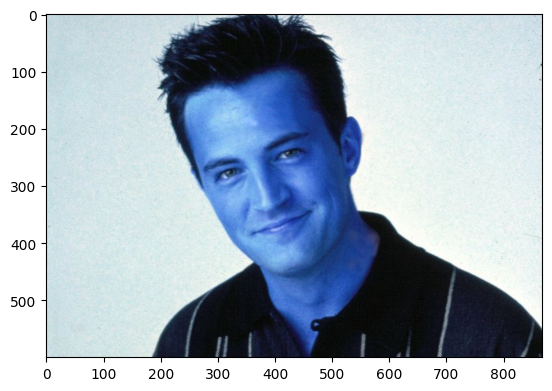

In [3]:
img = cv2.imread('./images_dataset/test_images/Matthew_8.jpg')

print(img.shape)
plt.imshow(img)

(600, 868)


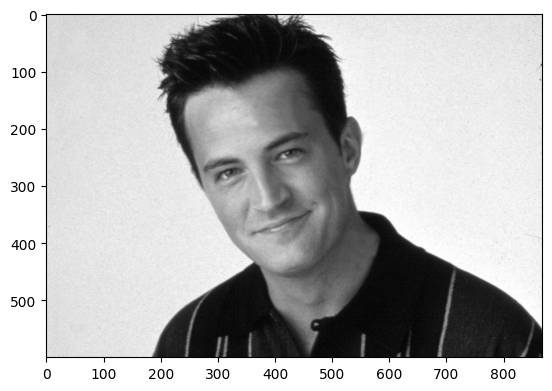

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

### Face and eyes

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5) # faces are detected in the gray image
print(faces[0]) # select first face

[214 144 302 302]


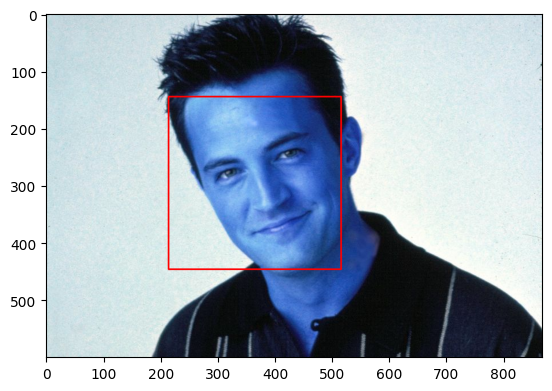

In [6]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0), 2) # plot in the color image
plt.imshow(face_img)

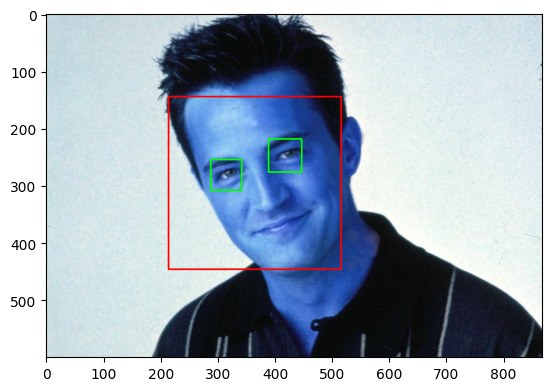

In [7]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_color = face_img[y:y+h, x:x+w]

    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)  # eyes are detected in the gray image
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # plot in the color image
        

plt.figure()
plt.imshow(face_img)
plt.show()

### Crop the facial region of the imag

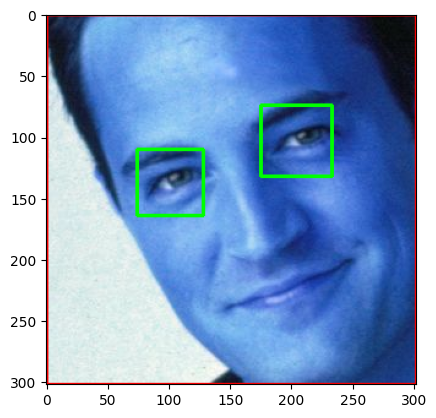

In [8]:
plt.imshow(roi_color)

In [9]:
cropped_img = np.array(roi_color)
print(cropped_img)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 25  38  60]
  ...
  [ 16  20  25]
  [ 23  26  30]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [223 236 234]
  ...
  [ 28  69 148]
  [ 30  71 150]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [225 236 234]
  ...
  [ 29  69 151]
  [ 30  70 152]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


### Wavelet transform 

In [10]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

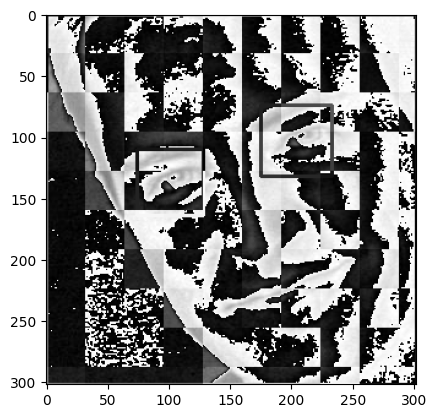

In [11]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### Function: detect 2 eyes and face

In [13]:
def get_cropped_image_if_2_eyes(image_path):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

## Preprocessing - all photos

In [14]:
import os

In [15]:
path_original = "./images_dataset/original/"

img_dirs = []
for entry in os.scandir(path_original):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./images_dataset/original/David_Schwimmer',
 './images_dataset/original/Jennifer_Aniston',
 './images_dataset/original/Lisa_Kudrow',
 './images_dataset/original/Courteney_Cox',
 './images_dataset/original/Matt_LeBlanc',
 './images_dataset/original/Matthew_Perry']

In [16]:
path_cropped = "./images_dataset/cropped/"
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                cropped_folder = path_cropped = "./images_dataset/cropped/" + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                    
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1 
                
        except: 
            print("ERROR IN IMAGE:", entry) 

ERROR IN IMAGE: <DirEntry 'David_76.jpg'>
ERROR IN IMAGE: <DirEntry '.DS_Store'>
ERROR IN IMAGE: <DirEntry '.DS_Store'>
ERROR IN IMAGE: <DirEntry 'Lisa_93.jpg'>
ERROR IN IMAGE: <DirEntry 'Lisa_43.jpg'>
